# Import Libraries

In [1]:
# import hierarchical clustering libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [2]:
crime=pd.read_csv('/content/crime_data.csv')
crime

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


Data **Exploration**

Descriptive Statistics

In [3]:
crime.describe()

,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


In [4]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [5]:
crime.drop(['Unnamed: 0'],axis=1,inplace=True)
crime

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


Missing Values

In [6]:
crime.isna().sum()

Murder      0
Assault     0
UrbanPop    0
Rape        0
dtype: int64

Duplicated Values

In [7]:
# Additionally we check the data for any duplicate values, now this can be an optional check depending on the data being used
crime.duplicated().sum()

0

In [8]:
crime[crime.duplicated()]

,Murder,Assault,UrbanPop,Rape


Exploratory Data Analysis

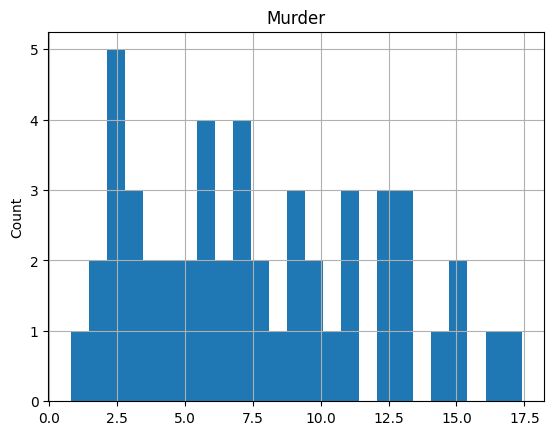

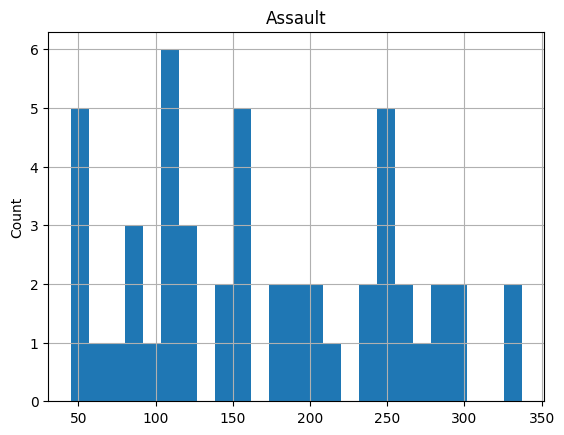

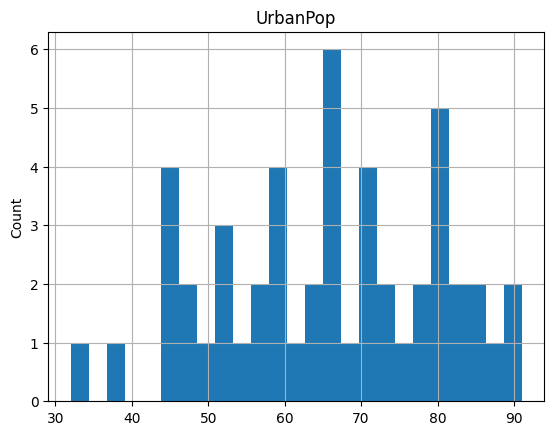

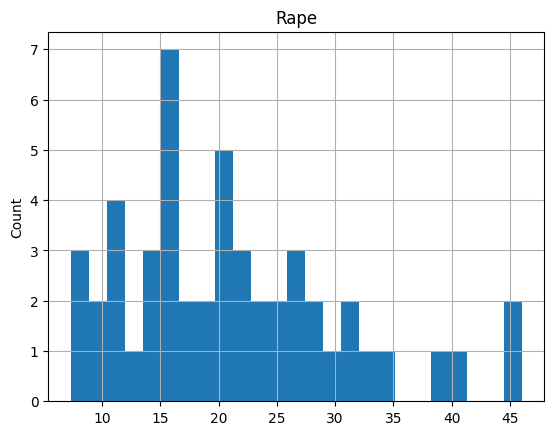

In [9]:
for feature in crime.columns:
    data=crime.copy()
    data[feature].hist(bins=25)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Murder


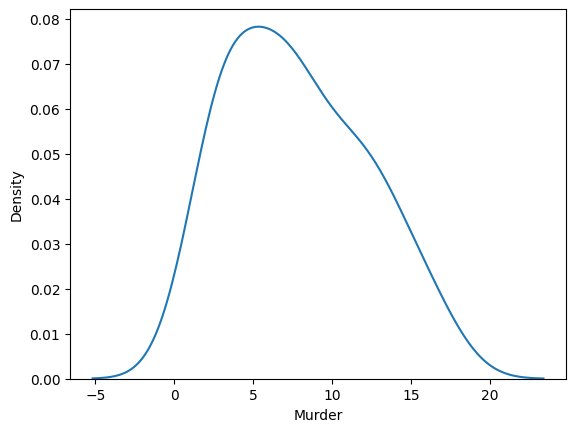

Assault


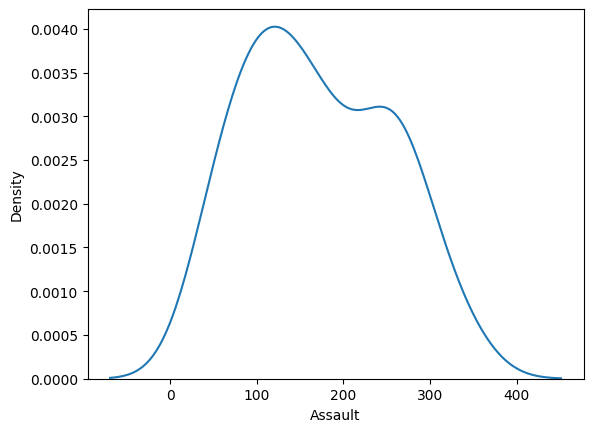

UrbanPop


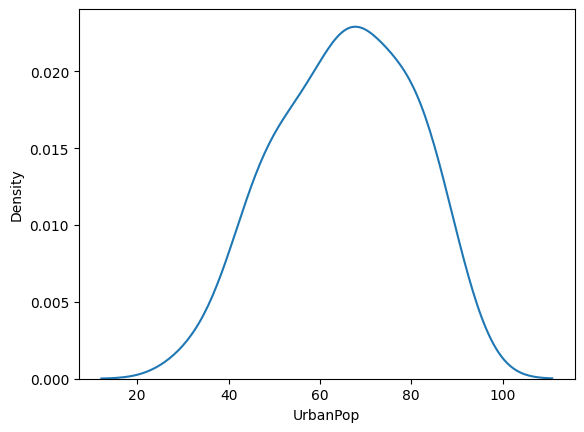

Rape


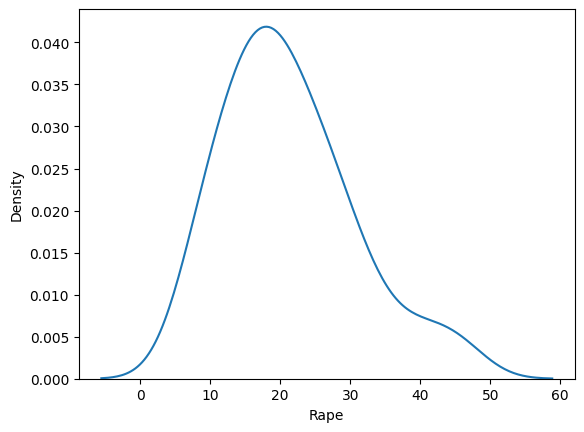

In [10]:
 # Kernel Density for every feature, singled out
import seaborn as sns
for n in data.columns:
    print(n)
    sns.kdeplot(data[n])
    plt.show()

Data Preprocessing

Standard Scaler

In [11]:
from sklearn.preprocessing import normalize

In [12]:
crime2_norm=pd.DataFrame(normalize(crime),columns=crime.columns)
crime2_norm

,Murder,Assault,UrbanPop,Rape
0,0.054031,0.966016,0.237411,0.086778
1,0.036872,0.969739,0.176987,0.164081
2,0.026439,0.959624,0.261122,0.101185
3,0.044528,0.961392,0.252998,0.098669
4,0.030657,0.940134,0.309972,0.138295
5,0.035594,0.919142,0.351437,0.174367
6,0.024486,0.816202,0.571341,0.082362
7,0.023674,0.954965,0.288897,0.063397
8,0.044478,0.967547,0.231056,0.092134
9,0.078534,0.952332,0.270805,0.116446


Applying different method of Hierarchical clustering

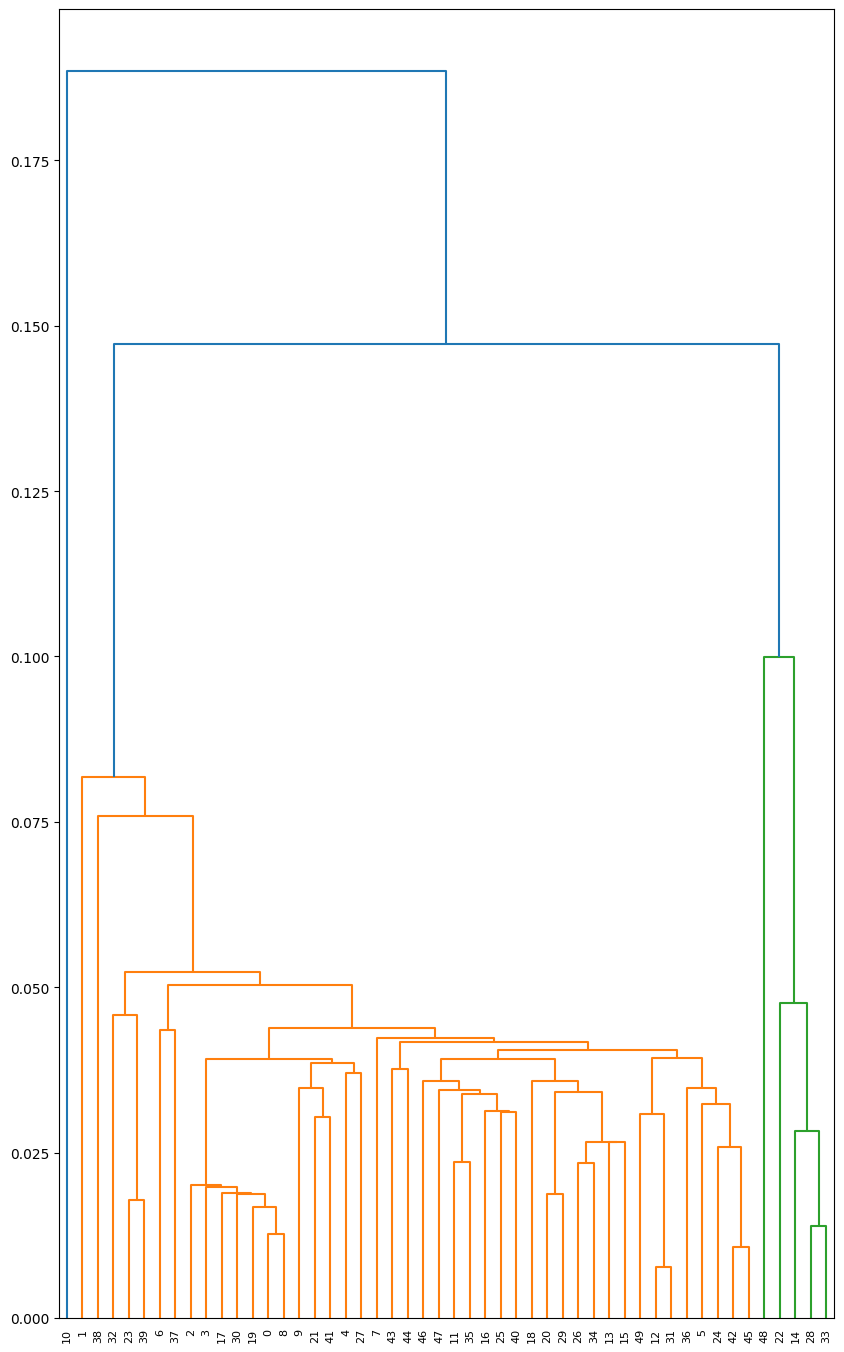

In [13]:
# Create Dendrograms
#methods=single
plt.figure(figsize=(10, 17))  
dendograms=sch.dendrogram(sch.linkage(crime2_norm,method='single'))

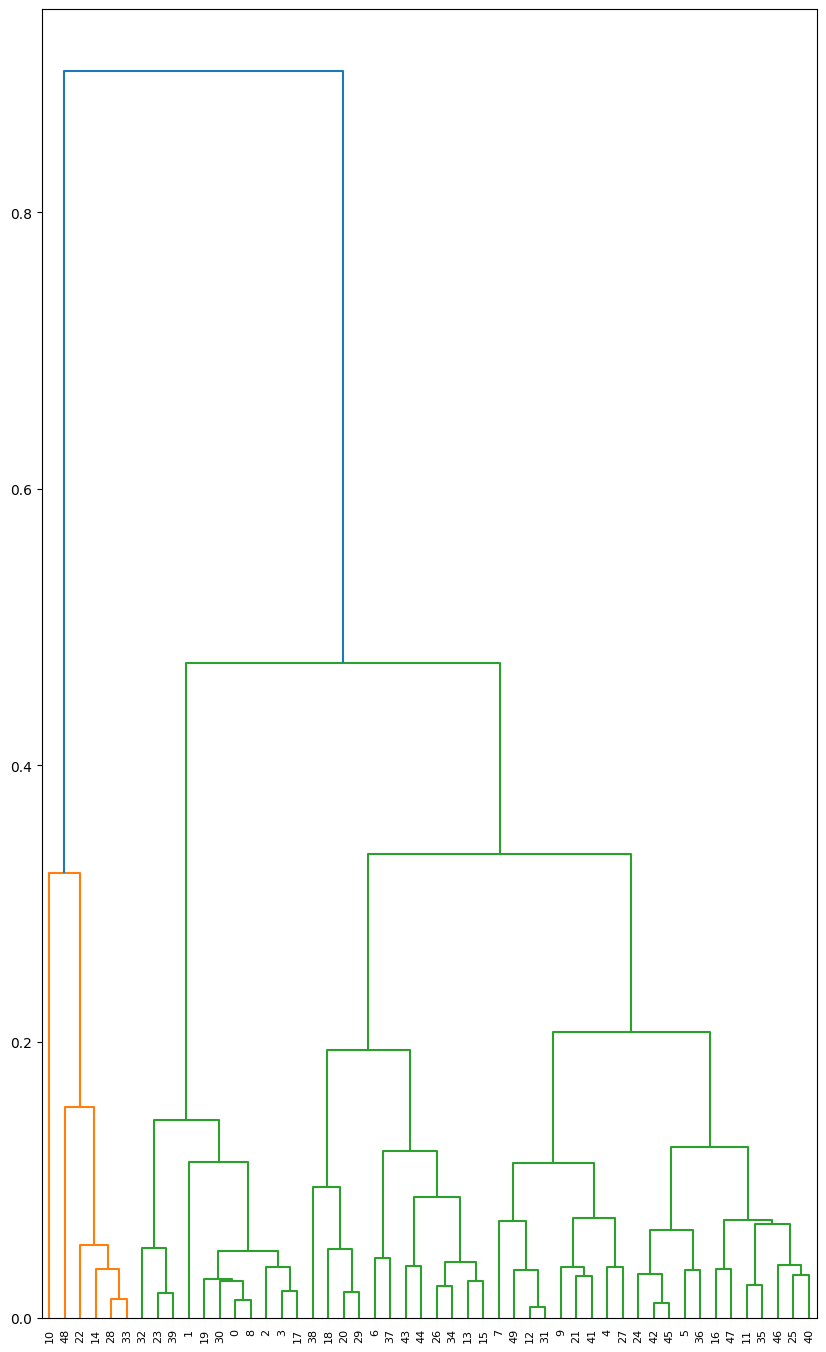

In [14]:
#methods=complete
plt.figure(figsize=(10, 17))  
dendograms=sch.dendrogram(sch.linkage(crime2_norm,method='complete'))

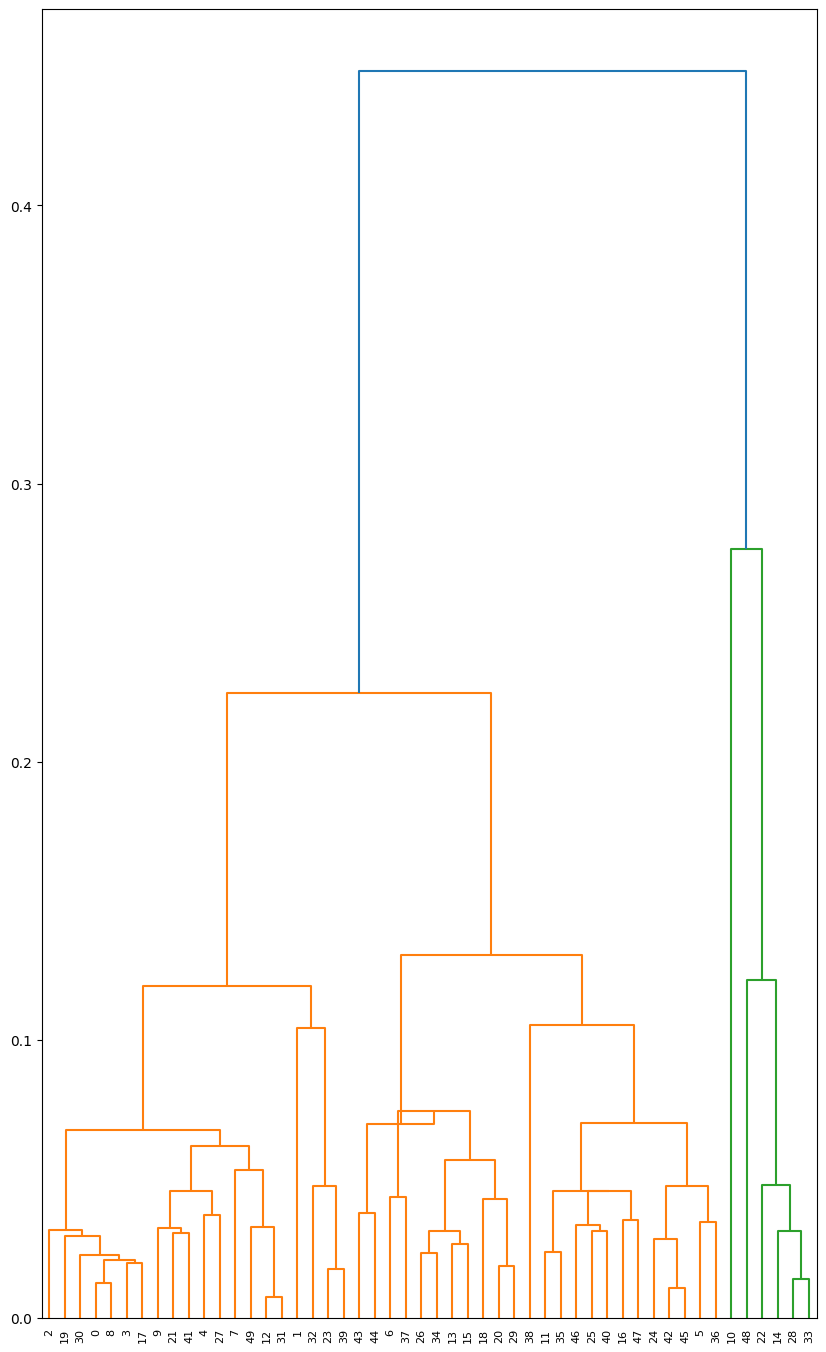

In [15]:
#methods=centroid
plt.figure(figsize=(10, 17))  
dendograms=sch.dendrogram(sch.linkage(crime2_norm,method='centroid'))

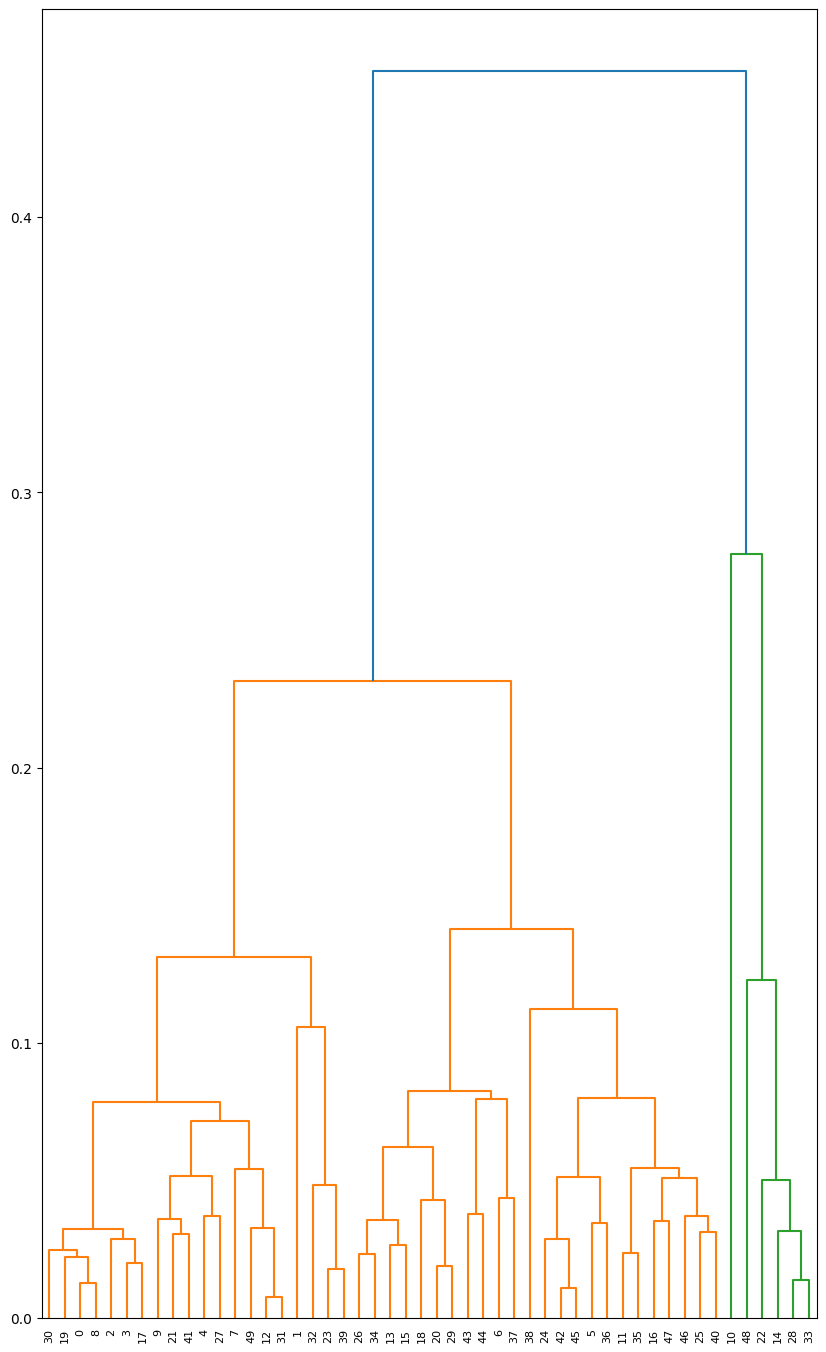

In [16]:
#methods=average
plt.figure(figsize=(10, 17))  
dendograms=sch.dendrogram(sch.linkage(crime2_norm,method='average'))

In [17]:
# Create Clusters (y)
hc=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='complete')
hc

AgglomerativeClustering(affinity='euclidean', linkage='complete', n_clusters=5)

In [18]:
# save clusters for chart
y_hc = hc.fit_predict(crime2_norm)
y_hc

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([2, 2, 2, 2, 0, 0, 1, 0, 2, 0, 4, 0, 0, 1, 3, 1, 0, 2, 1, 2, 1, 0,
       3, 2, 0, 0, 1, 0, 3, 1, 2, 0, 2, 3, 1, 0, 0, 1, 1, 2, 0, 0, 0, 1,
       1, 0, 0, 0, 3, 0])

In [19]:
crime['h_clusterid']=y_hc
crime.tail(30)

,Murder,Assault,UrbanPop,Rape,h_clusterid
20,4.4,149,85,16.3,1
21,12.1,255,74,35.1,0
22,2.7,72,66,14.9,3
23,16.1,259,44,17.1,2
24,9.0,178,70,28.2,0
25,6.0,109,53,16.4,0
26,4.3,102,62,16.5,1
27,12.2,252,81,46.0,0
28,2.1,57,56,9.5,3
29,7.4,159,89,18.8,1


In [20]:
crime['h_clusterid'].value_counts()

0    21
1    12
2    11
3     5
4     1
Name: h_clusterid, dtype: int64

In [21]:
crime.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,8.547619,180.142857,67.047619,24.452381
1,4.758333,116.583333,70.083333,15.683333
2,12.463636,275.181818,59.636364,25.990909
3,2.080000,56.600000,57.800000,10.760000
4,5.300000,46.000000,83.000000,20.200000


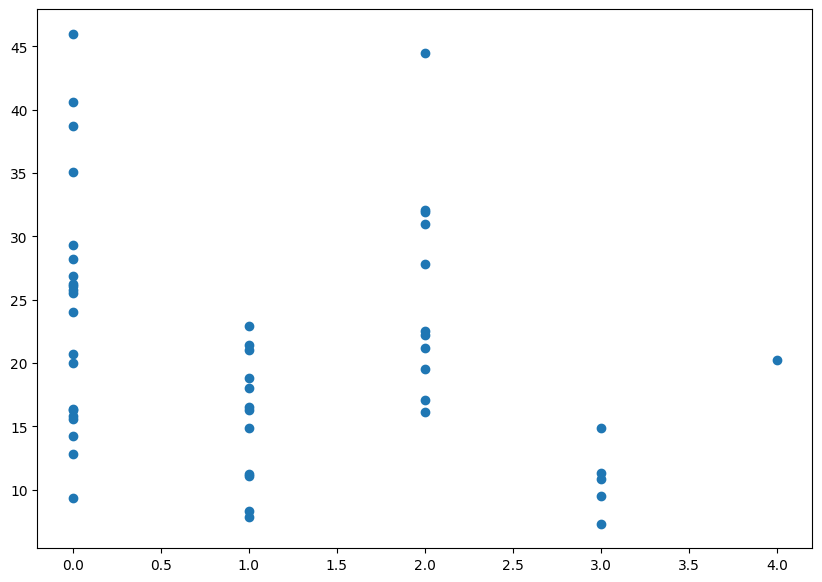

In [22]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(crime['h_clusterid'],crime['Rape'])

K-means

In [23]:
from sklearn.cluster import KMeans

In [24]:
crime1=crime.iloc[:,:11]
crime1

,Murder,Assault,UrbanPop,Rape,h_clusterid
0,13.2,236,58,21.2,2
1,10.0,263,48,44.5,2
2,8.1,294,80,31.0,2
3,8.8,190,50,19.5,2
4,9.0,276,91,40.6,0
5,7.9,204,78,38.7,0
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,0
8,15.4,335,80,31.9,2
9,17.4,211,60,25.8,0


In [25]:
# Normalization function
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

std_df=scaler.fit_transform(crime1)

In [26]:
std_df

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116,  0.85229443],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392,  0.85229443],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626,  0.85229443],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398,  0.85229443],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393, -0.96109797],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137, -0.96109797],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319, -0.05440177],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422, -0.96109797],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ,  0.85229443],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293, -0.96109797],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987,  2.66568682],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217, -0.96109797],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525, -0.96109797],
       [-0.13637203, -0.70012057, -0.0

Elbow Method

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

[250.00000000000006, 154.86298139827903, 120.72521667866695, 93.77135853846946, 72.94862775145589, 62.84355470817539, 55.57667796019878, 47.848716014283355, 43.57629264869972, 40.83311382229655]


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

Text(0, 0.5, 'WCSS(within cluster sum of squares)')

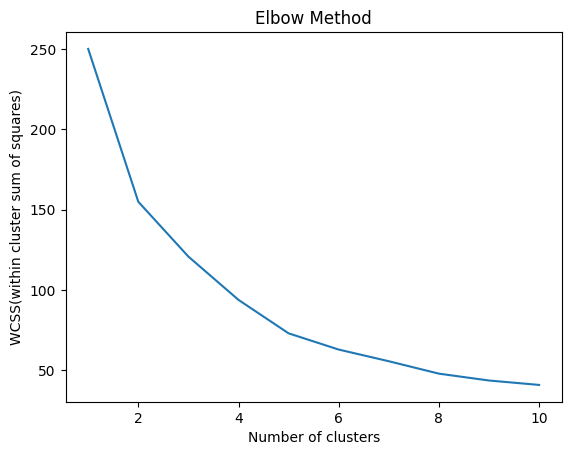

In [27]:
#WCSS (Within Cluster Sum of Squares)
wcss =[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, random_state=0)
  kmeans.fit(std_df)
  wcss.append(kmeans.inertia_)

print(wcss)
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS(within cluster sum of squares)')

From graph, we observed that 4 or 5 cluster is better

In [28]:
#Build Cluster Algorithm
from sklearn.cluster import  KMeans
clusters_new = KMeans(5, random_state=0)
clusters_new.fit(std_df)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=0)

In [29]:
clusters_new.labels_

array([1, 1, 1, 1, 2, 2, 4, 4, 1, 2, 3, 0, 2, 4, 3, 4, 0, 1, 0, 1, 4, 2,
       3, 1, 2, 0, 4, 2, 3, 4, 1, 2, 1, 3, 4, 4, 4, 4, 4, 1, 0, 2, 2, 4,
       0, 4, 4, 0, 3, 4], dtype=int32)

In [30]:
#assign clusters to the data set
crime1['clusters_new']= clusters_new.labels_

In [31]:
crime1

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusters_new
0,13.2,236,58,21.2,2,1
1,10.0,263,48,44.5,2,1
2,8.1,294,80,31.0,2,1
3,8.8,190,50,19.5,2,1
4,9.0,276,91,40.6,0,2
5,7.9,204,78,38.7,0,2
6,3.3,110,77,11.1,1,4
7,5.9,238,72,15.8,0,4
8,15.4,335,80,31.9,2,1
9,17.4,211,60,25.8,0,2


In [32]:
crime1.groupby('clusters_new').agg(['mean'])

,Murder,Assault,UrbanPop,Rape,h_clusterid
,mean,mean,mean,mean,mean
clusters_new,,,,,
0,4.585714,90.857143,46.571429,12.571429,0.285714
1,12.463636,275.181818,59.636364,25.990909,2.000000
2,11.500000,226.800000,76.200000,31.690000,0.000000
3,2.616667,54.833333,62.000000,12.333333,3.166667
4,5.593750,142.375000,72.562500,18.550000,0.625000


In [33]:
crime1['clusters_new']=crime1['clusters_new'].replace(0, 'Cluster 1')
crime1['clusters_new']=crime1['clusters_new'].replace(1, 'Cluster 2')
crime1['clusters_new']=crime1['clusters_new'].replace(2, 'Cluster 3')
crime1['clusters_new']=crime1['clusters_new'].replace(3, 'Cluster 4')
crime1['clusters_new']=crime1['clusters_new'].replace(4, 'Cluster 5')
crime1

,Murder,Assault,UrbanPop,Rape,h_clusterid,clusters_new
0,13.2,236,58,21.2,2,Cluster 2
1,10.0,263,48,44.5,2,Cluster 2
2,8.1,294,80,31.0,2,Cluster 2
3,8.8,190,50,19.5,2,Cluster 2
4,9.0,276,91,40.6,0,Cluster 3
5,7.9,204,78,38.7,0,Cluster 3
6,3.3,110,77,11.1,1,Cluster 5
7,5.9,238,72,15.8,0,Cluster 5
8,15.4,335,80,31.9,2,Cluster 2
9,17.4,211,60,25.8,0,Cluster 3


DBSCAN

In [69]:
#Import the libraries
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [70]:
crime2=crime.iloc[:,0:4]
crime2

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


Insert the data value in array format

In [71]:
data=crime2.values
data

array([[ 13.2, 236. ,  58. ,  21.2],
       [ 10. , 263. ,  48. ,  44.5],
       [  8.1, 294. ,  80. ,  31. ],
       [  8.8, 190. ,  50. ,  19.5],
       [  9. , 276. ,  91. ,  40.6],
       [  7.9, 204. ,  78. ,  38.7],
       [  3.3, 110. ,  77. ,  11.1],
       [  5.9, 238. ,  72. ,  15.8],
       [ 15.4, 335. ,  80. ,  31.9],
       [ 17.4, 211. ,  60. ,  25.8],
       [  5.3,  46. ,  83. ,  20.2],
       [  2.6, 120. ,  54. ,  14.2],
       [ 10.4, 249. ,  83. ,  24. ],
       [  7.2, 113. ,  65. ,  21. ],
       [  2.2,  56. ,  57. ,  11.3],
       [  6. , 115. ,  66. ,  18. ],
       [  9.7, 109. ,  52. ,  16.3],
       [ 15.4, 249. ,  66. ,  22.2],
       [  2.1,  83. ,  51. ,   7.8],
       [ 11.3, 300. ,  67. ,  27.8],
       [  4.4, 149. ,  85. ,  16.3],
       [ 12.1, 255. ,  74. ,  35.1],
       [  2.7,  72. ,  66. ,  14.9],
       [ 16.1, 259. ,  44. ,  17.1],
       [  9. , 178. ,  70. ,  28.2],
       [  6. , 109. ,  53. ,  16.4],
       [  4.3, 102. ,  62. ,  16.5],
 

In [72]:
stscaler = StandardScaler().fit(data)
x = stscaler.transform(data)
x

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [73]:
dbscan=DBSCAN(eps=1, min_samples=4)
dbscan.fit(x)

DBSCAN(eps=1, min_samples=4)

In [74]:
dbscan.labels_

array([ 0, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1,  1, -1,  1,  1,  1,  1,
        0,  1, -1,  1, -1,  1, -1,  1,  1,  1, -1,  1,  1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  0,  1,  0, -1,  1,  1,  1,  1,  1,  1,  1])

In [75]:
crime2['Cluster']=pd.DataFrame(dbscan.labels_)
crime2

,Murder,Assault,UrbanPop,Rape,Cluster
0,13.2,236,58,21.2,0
1,10.0,263,48,44.5,-1
2,8.1,294,80,31.0,-1
3,8.8,190,50,19.5,-1
4,9.0,276,91,40.6,-1
5,7.9,204,78,38.7,-1
6,3.3,110,77,11.1,1
7,5.9,238,72,15.8,-1
8,15.4,335,80,31.9,-1
9,17.4,211,60,25.8,-1


In [76]:
crime2['Cluster'].value_counts()

 1    28
-1    18
 0     4
Name: Cluster, dtype: int64

In [77]:
x=metrics.silhouette_score(x,dbscan.labels_)
x

0.2051154919322

In [78]:
def dbscan(x,eps,min_samples):
    ss=StandardScaler()
    x=ss.fit_transform(x)
    db=DBSCAN(eps=eps,min_samples=min_samples)
    db.fit(x)
    y_pred=db.fit_predict(x)
    plt.scatter(x[:,0],x[:,1],c=y_pred, cmap='Paired')
    plt.title("DBSCAN")

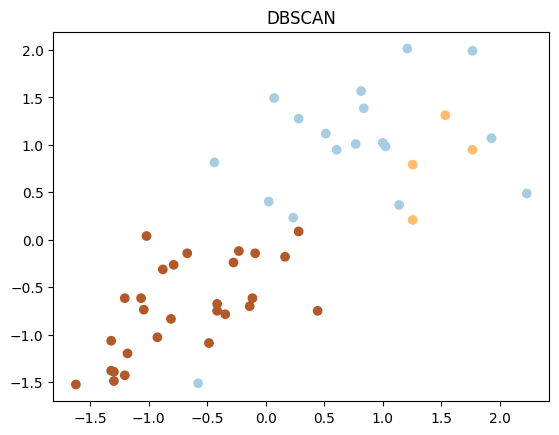

In [80]:
dbscan(data,1,4)